# Perf Calculate 
## IPM Perf 
 IPM performance: the input of ipm is unpacked and the outut of it is packed.
 there are no difference in GLB, CPPI and NW port. The width of bus is same.

In [140]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pkt_len = range(64,1000)

the key point of IPM is that input of it is two bus and output only one.

In [141]:
def cal_input_perf(pkt_len,bus,freq):
    pps = freq/math.ceil(pkt_len/bus)  # unit is Gpps
    pps = 2*pps if 2*pps <freq else freq
    input_traffic = pps *(20+pkt_len)*8
    return input_traffic
    
def cal_output_perf(pkt_len,bus,freq,pack):
    pps_pack = freq/math.ceil(pkt_len/(bus/2))*2
    pps_unpack = freq/math.ceil(pkt_len/bus)
    pps = pps_pack if pack else pps_unpack
    output_traffic = pps *(20+pkt_len)*8 
    return output_traffic


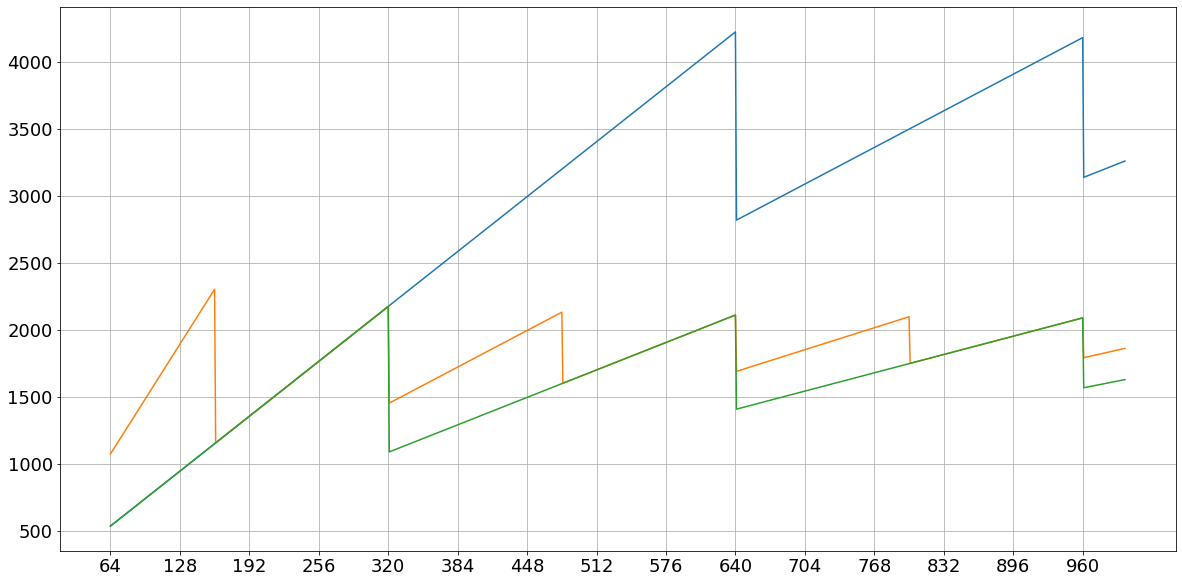

,length,traf_in,traf_out_pack,traf_out_unpack
0,64,537.6,1075.2,537.6
1,65,544.0,1088.0,544.0
2,66,550.4,1100.8,550.4
3,67,556.8,1113.6,556.8
4,68,563.2,1126.4,563.2


In [143]:
bus = 320
freq = 0.8
pack =1
traffic_in=[]
traffic_out=[]
traffic_out_unpack =[]
perf_print=[]
for length in pkt_len:
    traffic_in.append(cal_input_perf(length,bus,freq))
    traffic_out.append(cal_output_perf(length,bus,freq,pack))
    traffic_out_unpack.append(cal_output_perf(length,bus,freq,0))
    tmp = {'length': length,
           'traf_in':cal_input_perf(length,bus,freq),
           'traf_out_pack':cal_output_perf(length,bus,freq,pack),
           'traf_out_unpack':cal_output_perf(length,bus,freq,0)}
    perf_print.append(tmp)
#print(traffic)
plt.figure(figsize=(20,10))
plt.grid(True)
plt.tick_params(labelsize=18)
my_x_ticks = np.arange(0,1010,64)
plt.xticks(my_x_ticks)
plt.plot(pkt_len,traffic_in)
plt.plot(pkt_len,traffic_out) #traffic input
plt.plot(pkt_len,traffic_out_unpack)

plt.show()

my_pd = pd.DataFrame(perf_print)
my_pd.head()

## EPM perf 
EPM has three kind of output, we calculate NW port firstly.

### NW port performance
